<a href="https://colab.research.google.com/github/riqx-code/CARscan/blob/main/DEMO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TASK-1 : Damage Identification

## INSTALLATION of PACKAGES

In [ ]:
from shapely.geometry import Polygon
import json 
import cv2 as cv
from google.colab.patches import cv2_imshow as imshow

## FILE LOADING 

WE load json files using path

path_json_x : where x is 1,2,etc. are json files of car parts

path_json_damage_x : where x is 1,2,etc are json files of damage parts

dx : is json loaded file of car parts

ddx : is json loaded file of damaged car parts

In [ ]:
# import Images using json file
fx = open(path_json_x)
fdx = open(path_json_damage_x)

# loading json file 

dx = json.load(fx)

ddx = json.load(fdx)

## DATA ARRANGEMENT 

now lets arrange the data from json files.

we need list of points, which are in list of directories so using thier index we extract them and store them in lists.

1.   **CPART** : It is list of car's list of ***points*** of ***parts***
2.   **CDPART** : It is list of car's list of ***damaged part points***
3.   **CNAME** : It is list of ***parts names*** and at last contains ***side of the vehicle***
4.   **DAMTYPE** : It contains names of type of damages corresponding to each car ,each damage specified


Code of the following , but we cant run them as we did loaded the files

## CPART

In [ ]:
# list of parts of all cars

# car part list 
cpart = []
# first car parts 
l = []
for i in range(len(d1)):
    l.append(d1[i]['value']['points'])
    if i == len(d1)-1:
      cpart.append(l)
      l=[]
# second car parts
l = []
for i in range(len(d2)):
    l.append(d2[i]['value']['points'])
    if i == len(d2)-1:
      cpart.append(l)
      l=[]
# third car parts
l = []
for i in range(len(d3)):
    l.append(d3[i]['value']['points'])
    if i == len(d3)-1:
      cpart.append(l)
      l=[]
# fourth car parts
l = []
for i in range(len(d4)):
    l.append(d4[i]['value']['points'])
    if i == len(d4)-1:
      cpart.append(l)
      l=[]
# fifth car part
l = []
for i in range(len(d5)):
    l.append(d5[i]['value']['points'])
    if i == len(d5)-1:
      cpart.append(l)
      l=[]

## CDPART

In [ ]:
# list of damage area of all cars

# car part list 
cdpart = []
# first car damage area
l = []
for i in range(len(dd1)):
    l.append(dd1[i]['value']['points'])
    if i == len(dd1)-1:
      cdpart.append(l)
      l=[]
# second car damage area
l = []
for i in range(len(dd2)):
    l.append(dd2[i]['value']['points'])
    if i == len(dd2)-1:
      cdpart.append(l)
      l=[]
# third car damage area
l = []
for i in range(len(dd3)):
    l.append(dd3[i]['value']['points'])
    if i == len(dd3)-1:
      cdpart.append(l)
      l=[]
# fourth car damage area
l = []
for i in range(len(dd4)):
    l.append(dd4[i]['value']['points'])
    if i == len(dd4)-1:
      cdpart.append(l)
      l=[]
# fifth car damage area
l = []
for i in range(len(dd5)):
    l.append(dd5[i]['value']['points'])
    if i == len(dd5)-1:
      cdpart.append(l)
      l=[]

## CNAME

In [ ]:
# list of parts  name of all cars

# car part name list 
cname = []
# first car parts area
l = []
for i in range(len(d1)):
    l.append(d1[i]['value']['polygonlabels'][0])
    if i == len(d1)-1:
      cname.append(l)
      l=[]
# second car parts area
l = []
for i in range(len(d2)):
    l.append(d2[i]['value']['polygonlabels'][0])
    if i == len(d2)-1:
      cname.append(l)
      l=[]
# third car parts area
l = []
for i in range(len(d3)):
    l.append(d3[i]['value']['polygonlabels'][0])
    if i == len(d3)-1:
      cname.append(l)
      l=[]
# fourth car parts area
l = []
for i in range(len(d4)):
    l.append(d4[i]['value']['polygonlabels'][0])
    if i == len(d4)-1:
      cname.append(l)
      l=[]
# fifth car part area
l = []
for i in range(len(d5)):
    l.append(d5[i]['value']['polygonlabels'][0])
    if i == len(d5)-1:
      cname.append(l)
      l=[]

## MANUAL POSITION MARKING

Why manual position marking , in provided json files in github. So i saw the pictures of 5 cars and manually added them to CNAME lsit


In [ ]:
# image load
x : car number

imgx = cv.imread(path_x)

imshow(imgx)

cname[x].append(position)

## DAMTYPE

In [ ]:
# list of damage type of all cars

# car damage type list 
damtype = []
# first car damage type
l = []
for i in range(len(dd1)):
    l.append(dd1[i]['value']['polygonlabels'][0])
    if i == len(dd1)-1:
      damtype.append(l)
      l=[]
# second car damage type
l = []
for i in range(len(dd2)):
    l.append(dd2[i]['value']['polygonlabels'][0])
    if i == len(dd2)-1:
      damtype.append(l)
      l=[]
# third car damage type
l = []
for i in range(len(dd3)):
    l.append(dd3[i]['value']['polygonlabels'][0])
    if i == len(dd3)-1:
      damtype.append(l)
      l=[]
# fourth car damage type
l = []
for i in range(len(dd4)):
    l.append(dd4[i]['value']['polygonlabels'][0])
    if i == len(dd4)-1:
      damtype.append(l)
      l=[]
# fifth car damage type
l = []
for i in range(len(dd5)):
    l.append(dd5[i]['value']['polygonlabels'][0])
    if i == len(dd5)-1:
      damtype.append(l)
      l=[]

## USING OVERLAPPING AREA calculation of DAMAGED AREA

FUNCTION

In [ ]:
def inter(l1,l2):
  p = Polygon(l1)
  q = Polygon(l2)
  return p.intersection(q).area

We check for overlapping between each damage area and car part for each car using FOR LOOP. we store it in **damageinfo** list 

In [ ]:
damageinfo = []

for i in range(5):
  l = []
  for j in range(len(cdpart[i])):
    for k in range(len(cpart[i])):
      x = inter(cpart[i][k],cdpart[i][j])
      if(x != 0):
        carpart_poly = Polygon(cpart[i][k])
        carpart_area = carpart_poly.area
        li = {}
        li['damage_area'] = x
        li['damage_area_percent'] = (x/carpart_area)*100
        li['damage_at'] = cname[i][k]
        li['damage_type'] = damtype[i][j]
        li['damage_position'] = cname[i][-1]
        l.append(li)
  
  l.append(len(l))
  damageinfo.append(l)

## NOW OUTPUT AND EXPORT DATA INTO FILE 

I stored the damage area and other information in list of dictionary

In [ ]:
# Data Printing

for i in range(len(damageinfo)):
  print(f"car number {i+1} ")
  l = damageinfo[i]
  for j in range(len(l)-1):
    print(f"In car-{i+1} , damage no :{j+1} , damage_area :   {l[j]['damage_area']} , damage_percent : {l[j]['damage_area_percent']}%  at  {l[j]['damage_position']+' '+l[j]['damage_at']}     of type    {l[j]['damage_type']} ")
  print('\n')

car number 1 
In car-1 , damage no :1 , damage_area :   27.39992318240925 , damage_percent : 2.0693846126349302%  at  backside Bumper     of type    Dent&Scratch(zoom) 
In car-1 , damage no :2 , damage_area :   37.63563368055555 , damage_percent : 2.842438670605734%  at  backside Bumper     of type    Dent&Scratch(zoom) 


car number 2 
In car-2 , damage no :1 , damage_area :   5.807680028750534 , damage_percent : 1.479655520553034%  at  Door Bumper     of type    Dent&Scratch 
In car-2 , damage no :2 , damage_area :   3.004953953908596 , damage_percent : 2.2475880078904065%  at  Door Light     of type    Dent&Scratch 
In car-2 , damage no :3 , damage_area :   569.9466264509899 , damage_percent : 24.62802443458822%  at  Door Fender     of type    Dent&Scratch 
In car-2 , damage no :4 , damage_area :   293.9875782953624 , damage_percent : 26.997199857888777%  at  Door Door     of type    Dent&Scratch 
In car-2 , damage no :5 , damage_area :   4.071958968729028 , damage_percent : 0.32811

### I have provided results file in taskone folder.

## TASK-2 : Damage Classifer

## Package Importing

In [ ]:
# To build classifier
import tensorflow as tf

# ImageDataGenerator module used for image preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# images are stored in arrays form , so to operate on then we need a array module
import numpy as np

# to get image parameters I use opencv
import cv2 as cv

# to import subject image in google colab I need this module
from google.colab import files

# to show evaluvation results
import matplotlib.pyplot as plt

## DATA IMPORTING & PREPROCESSING

*** rescalling*** : it is done to reduce then number size so we can processes fastly. we multiply input using **1.0/255**

I used **ImageDataGeneartor**

In [ ]:
train_data = ImageDataGenerator(rescale = 1.0/255)
test_data = ImageDataGenerator(rescale = 1.0/255)

Batch_size as we have arround ***1800(train) + 500(test)*** images lets keep it as ***50***

***target_size*** is dimentions of the input image , ***resizing** the images to keep all input sizes uniform.It can be any ***arbitary value***.So I picked ***(200,200)***

We have two output classes so ***class_mode*** is ***'binary'***


I Used **flow_from_directory** to get training data from hireachical floder structure

Training data generator

In [ ]:
train_gen = train_data.flow_from_directory(path,batch_size=50,class_mode='binary',target_size=(200, 200))

Testing data generator

In [ ]:
test_gen =  test_data.flow_from_directory(path,batch_size=50,class_mode='binary',target_size=(200,200))

## MODEL CREATION


1.   CONVOLUTION LAYER : it's the filter that extracts the feature from a image
2.   Max pooling : This process helps us in considering only pixels that sustained(enought activation value) after convolution.

So we use **CONVOLUTION LAYER** and **Max Pooling layer** as pair.

We are going to use 3 pairs of CONV2D and Max_pooling layers in hidden layers.Then a **flatenning layer** then we try to converg all the outputs using two **dense layers**.

***Layer Parameters***


1.   Convolution layer 1 :
          Kernal size = 3 x 3 
          no.of filters = 16
          relu activation
          input = image of shape 200,200,3 : RGB
      Pooling Layer 1:
          size = 2,2

2.   Convolution layer 2 :
          Kernal size = 3 x 3 
          no.of filters = 32
          relu activation
          input = size of Max_pooling 1
      Pooling Layer 2:
          size = 2,2

3.   Convolution layer 3 :
          Kernal size = 3 x 3 
          no.of filters = 64
          relu activation
          input = size of Max_pooling 2
      Pooling Layer 3:
          size = 2,2

4. Flatten layer :

          input size = 23 x 23 x 64

          output size = 33856

5. Dense Layer 1 :

          converges 33856 tensors output to 512 tensor outputs

6. Dense Layer 2 :

          converges 512 tensors output to 1 class output

---

Every model contain following code

- model layer sequencing 

- model compiling 

- model fitting

- model evaluvation 

- feature map extraction 

---

**MODEL LAYER SEQUENCING** 

- I'm using 3 pair of convolution2D layer &  Maxpooling layers, in some models i will use only 2 pair of layers

- as number of layers increases number of filters increases from 16,32,64.

- I used kernel size of 3 X 3 

- all inner layers uses 'relu' activation

**MODEL COMPILING** 

Compiling a model is adding a few process of operation how model will train itself. Arguments for compiler

1. optimizer : it helps in backtracking phase to change layer weights and biases

    we can use the following optimizers :

      ***SGD − Stochastic gradient descent optimizer***

      ***RMSprop − RMSProp optimizer***

      ***Adam − Adam optimizer***

      ***Adamax − Adamax optimizer from Adam***

      ***Nadam − Nesterov Adam optimizer***

      I prefered Adam optimizer as it's **faster**  , **good noise reception** and **optimized** compared to other.

2. Loss : It helps in calculation of error during backtracking 

      we have different types of loss function but for binary classification we generally prefer **Binary cross entropy**.

3. Metric : 
    It's a comparision function same as Loss , but we don't use it for training but we use this for evaluvation purposes.
      I'm using **'accuracy'** as the metric.


**MODEL FITTING**

We pass the data through the CNN , Number of times of forward and backward propagation = **epoch**.

steps_per_epoch : The quotient of total sample size / batch size 

here  1840/50 = 36

for testing = 460/50 = 9

**MODEL EVALUVATION**
I used ***history*** function & matplotlib  to visuvalize the training parameters.
I used 15 epoches : a arbitary number 

1.   Training Accuracy : After 15 epoches , model got to 100% accuracy.So we need not improve or diversify the training data.
2.   Validation Accuracy : Here Validation accuracy is lower than Training accuracy, but it's 80% which is a good model.If I would get


**FEARURE MAPPING**

 I used it to improve the model at each step.
 

---

MODEL NAMES

- normal model : model

- early stopping : model_es

- data augumented : model_da

- 2 layers : model_simp

- data augumented 2 layer : model_dasimp

- optimizer 'adam' to 'RMSprop' 2 layers : model_opt

- 'RMSprop' 3 layers : model_opt2

### DONT RUN ANY CELL they dont have paths connected

NORMAL MODEL

In [ ]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics = ['accuracy'])

In [ ]:
history = model.fit(
            train_gen, # pass in the training generator
            steps_per_epoch=36,
            epochs=15,
            validation_data=test_gen, # pass in the validation generator
            validation_steps=9,
            verbose=2
            )

Epoch 1/15
36/36 - 459s - loss: 0.8589 - accuracy: 0.5966 - val_loss: 0.6054 - val_accuracy: 0.6733 - 459s/epoch - 13s/step
Epoch 2/15
36/36 - 92s - loss: 0.5296 - accuracy: 0.7520 - val_loss: 0.5187 - val_accuracy: 0.7333 - 92s/epoch - 3s/step
Epoch 3/15
36/36 - 86s - loss: 0.4192 - accuracy: 0.8257 - val_loss: 0.5313 - val_accuracy: 0.7356 - 86s/epoch - 2s/step
Epoch 4/15
36/36 - 87s - loss: 0.3513 - accuracy: 0.8536 - val_loss: 0.5120 - val_accuracy: 0.7489 - 87s/epoch - 2s/step
Epoch 5/15
36/36 - 87s - loss: 0.2589 - accuracy: 0.8961 - val_loss: 0.4521 - val_accuracy: 0.7889 - 87s/epoch - 2s/step
Epoch 6/15
36/36 - 84s - loss: 0.1651 - accuracy: 0.9447 - val_loss: 0.4717 - val_accuracy: 0.7911 - 84s/epoch - 2s/step
Epoch 7/15
36/36 - 87s - loss: 0.0977 - accuracy: 0.9682 - val_loss: 0.5518 - val_accuracy: 0.7933 - 87s/epoch - 2s/step
Epoch 8/15
36/36 - 92s - loss: 0.0628 - accuracy: 0.9827 - val_loss: 0.6029 - val_accuracy: 0.8000 - 92s/epoch - 3s/step
Epoch 9/15
36/36 - 84s - loss

In [ ]:
acu = history.history['accuracy']
val_acu = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acu)) 

 
plt.plot(epochs, acu)
plt.plot(epochs, val_acu)
plt.title('Training accuracy &  Testing accuracy')
plt.figure()

# plot loss 
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training loss &  Testing loss')

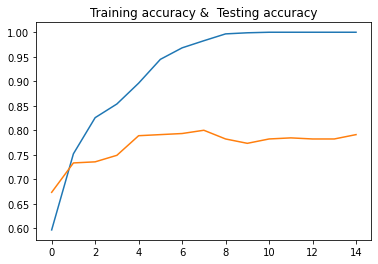

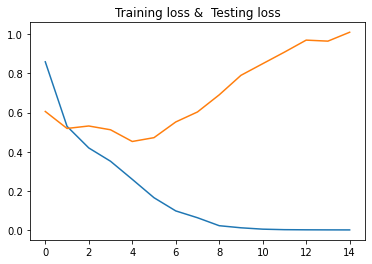

---

### OVERFITTING PROBLEM : early stopping

EARLY STOPING MODEL

callback when val_accuracy dont improve for 3 epoches

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)

In [ ]:
model_es = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [ ]:
model_es.compile(optimizer='adam',loss='binary_crossentropy',metrics = ['accuracy'])

In [ ]:
history_es = model_es.fit(
            train_gen, # pass in the training generator
            steps_per_epoch=36,
            epochs=15,
            validation_data=test_gen, # pass in the validation generator
            validation_steps=9,
            callbacks=[callback],
            verbose=2
            )

Epoch 1/15
36/36 - 88s - loss: 0.7812 - accuracy: 0.5849 - val_loss: 0.6028 - val_accuracy: 0.6911 - 88s/epoch - 2s/step
Epoch 2/15
36/36 - 83s - loss: 0.5278 - accuracy: 0.7486 - val_loss: 0.4808 - val_accuracy: 0.7733 - 83s/epoch - 2s/step
Epoch 3/15
36/36 - 83s - loss: 0.4012 - accuracy: 0.8201 - val_loss: 0.4872 - val_accuracy: 0.7644 - 83s/epoch - 2s/step
Epoch 4/15
36/36 - 85s - loss: 0.3355 - accuracy: 0.8698 - val_loss: 0.4609 - val_accuracy: 0.7867 - 85s/epoch - 2s/step
Epoch 5/15
36/36 - 83s - loss: 0.2600 - accuracy: 0.9006 - val_loss: 0.4995 - val_accuracy: 0.7644 - 83s/epoch - 2s/step
Epoch 6/15
36/36 - 83s - loss: 0.1748 - accuracy: 0.9335 - val_loss: 0.6191 - val_accuracy: 0.7356 - 83s/epoch - 2s/step
Epoch 7/15
36/36 - 83s - loss: 0.1326 - accuracy: 0.9531 - val_loss: 0.5271 - val_accuracy: 0.7844 - 83s/epoch - 2s/step


EVALUVATION 

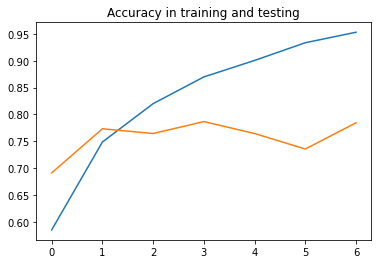

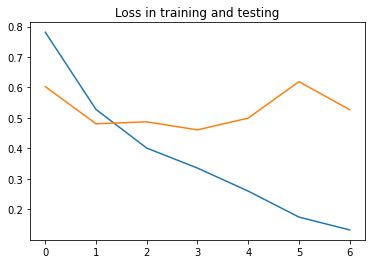

FEATURE MAPPING : one image of maxpooling , significant

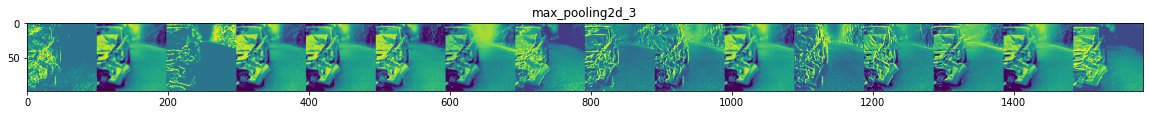

---

No Improvement in ***valuvation_accuracy*** , by looking at feature maps lets try **Data Augumentation**

DATA AUGUMENTATION MODEL

In [ ]:
data_augumentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal',input_shape=(200,200,3)),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1)
])

In [ ]:
model_da = tf.keras.models.Sequential([
    data_augumentation, # data augumentation added
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),  # random layer droping 
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [ ]:
model_da.compile(optimizer='adam',loss='binary_crossentropy',metrics = ['accuracy'])

In [ ]:
history_da = model_da.fit(
            train_gen, # pass in the training generator
            steps_per_epoch=36,
            epochs=15,
            validation_data=test_gen, # pass in the validation generator
            validation_steps=9,
            verbose=2
            )

Epoch 1/15
36/36 - 95s - loss: 0.9022 - accuracy: 0.5589 - val_loss: 0.6545 - val_accuracy: 0.6378 - 95s/epoch - 3s/step
Epoch 2/15
36/36 - 96s - loss: 0.6303 - accuracy: 0.6536 - val_loss: 0.6820 - val_accuracy: 0.6044 - 96s/epoch - 3s/step
Epoch 3/15
36/36 - 92s - loss: 0.6028 - accuracy: 0.6922 - val_loss: 0.5695 - val_accuracy: 0.6889 - 92s/epoch - 3s/step
Epoch 4/15
36/36 - 102s - loss: 0.5633 - accuracy: 0.7156 - val_loss: 0.6326 - val_accuracy: 0.6556 - 102s/epoch - 3s/step
Epoch 5/15
36/36 - 96s - loss: 0.5393 - accuracy: 0.7341 - val_loss: 0.5629 - val_accuracy: 0.7156 - 96s/epoch - 3s/step
Epoch 6/15
36/36 - 98s - loss: 0.5298 - accuracy: 0.7464 - val_loss: 0.7340 - val_accuracy: 0.6444 - 98s/epoch - 3s/step
Epoch 7/15
36/36 - 93s - loss: 0.5070 - accuracy: 0.7626 - val_loss: 0.4701 - val_accuracy: 0.7733 - 93s/epoch - 3s/step
Epoch 8/15
36/36 - 94s - loss: 0.4849 - accuracy: 0.7721 - val_loss: 0.7438 - val_accuracy: 0.6822 - 94s/epoch - 3s/step
Epoch 9/15
36/36 - 92s - loss:

EVALUVATION 

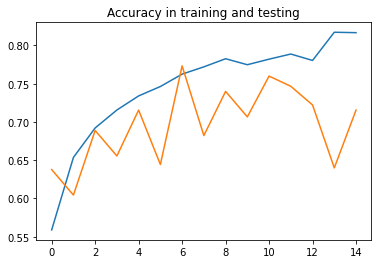

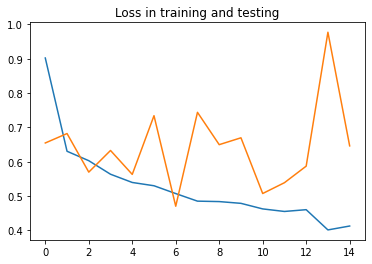

FEATURE MAPPING

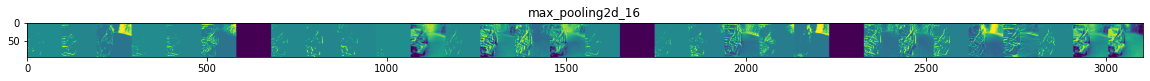

---

Even after ***DATA AUGUMENTATION*** validation_accuracy is still **71 %**
and train_accuracy is ***81 %***

So Now lets simplify the model, remove one pair of conv2D and Maxpooling layers with out ***augumentation***

So , lets remove a conv2D layer and Maxpooling layer 

---

2 LAYER MODEL

In [ ]:
model_simp = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Dropout(0.2),  # random layer droping 
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [ ]:
model_simp.compile(optimizer='adam',loss='binary_crossentropy',metrics = ['accuracy'])

In [ ]:
history_simp = model_simp.fit(
            train_gen, # pass in the training generator
            steps_per_epoch=36,
            epochs=15,
            validation_data=test_gen, # pass in the validation generator
            validation_steps=9,
            verbose=2
            )

Epoch 1/15
36/36 - 86s - loss: 3.0319 - accuracy: 0.5229 - val_loss: 0.6812 - val_accuracy: 0.5133 - 86s/epoch - 2s/step
Epoch 2/15
36/36 - 79s - loss: 0.6297 - accuracy: 0.6257 - val_loss: 1.0192 - val_accuracy: 0.5533 - 79s/epoch - 2s/step
Epoch 3/15
36/36 - 90s - loss: 0.5194 - accuracy: 0.7603 - val_loss: 0.4986 - val_accuracy: 0.7689 - 90s/epoch - 3s/step
Epoch 4/15
36/36 - 80s - loss: 0.3323 - accuracy: 0.8659 - val_loss: 0.4631 - val_accuracy: 0.7978 - 80s/epoch - 2s/step
Epoch 5/15
36/36 - 81s - loss: 0.1859 - accuracy: 0.9363 - val_loss: 0.6738 - val_accuracy: 0.7044 - 81s/epoch - 2s/step
Epoch 6/15
36/36 - 82s - loss: 0.1087 - accuracy: 0.9728 - val_loss: 0.5644 - val_accuracy: 0.7644 - 82s/epoch - 2s/step
Epoch 7/15
36/36 - 79s - loss: 0.0422 - accuracy: 0.9939 - val_loss: 0.6838 - val_accuracy: 0.7578 - 79s/epoch - 2s/step
Epoch 8/15
36/36 - 82s - loss: 0.0209 - accuracy: 0.9966 - val_loss: 0.6850 - val_accuracy: 0.7756 - 82s/epoch - 2s/step
Epoch 9/15
36/36 - 79s - loss: 0

EVALUVATION

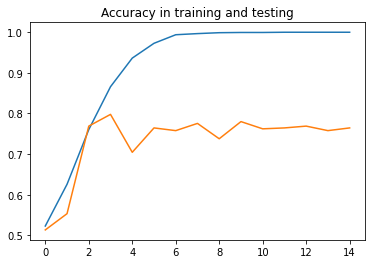

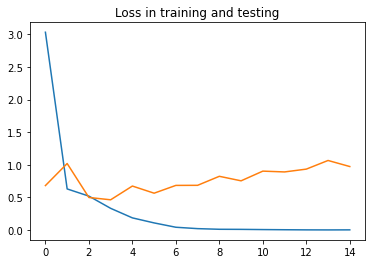

FEATURE MAPPING

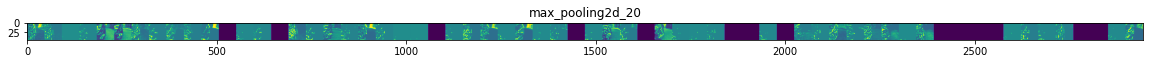

As we can see in results **data augumentation** helped to keep shape of validation_accuracy. And ***simplified model*** helped with proper shape so lets try **data augumented simplified model**

---

2 LAYER DATA AUGUMENTED MODEL

In [ ]:
model_dasimp = tf.keras.models.Sequential([
    data_augumentation, # data augumentation
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Dropout(0.2),  # random layer droping 
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [ ]:
model_dasimp.compile(optimizer='adam',loss='binary_crossentropy',metrics = ['accuracy'])

In [ ]:
history_dasimp = model_dasimp.fit(
            train_gen, # pass in the training generator
            steps_per_epoch=36,
            epochs=15,
            validation_data=test_gen, # pass in the validation generator
            validation_steps=9,
            verbose=2
            )

Epoch 1/15
36/36 - 99s - loss: 1.6000 - accuracy: 0.4983 - val_loss: 0.6739 - val_accuracy: 0.5911 - 99s/epoch - 3s/step
Epoch 2/15
36/36 - 88s - loss: 0.6516 - accuracy: 0.6162 - val_loss: 0.6329 - val_accuracy: 0.6244 - 88s/epoch - 2s/step
Epoch 3/15
36/36 - 88s - loss: 0.6137 - accuracy: 0.6581 - val_loss: 0.5975 - val_accuracy: 0.6844 - 88s/epoch - 2s/step
Epoch 4/15
36/36 - 88s - loss: 0.5953 - accuracy: 0.6765 - val_loss: 0.6058 - val_accuracy: 0.6556 - 88s/epoch - 2s/step
Epoch 5/15
36/36 - 90s - loss: 0.5757 - accuracy: 0.6911 - val_loss: 0.5868 - val_accuracy: 0.7022 - 90s/epoch - 3s/step
Epoch 6/15
36/36 - 88s - loss: 0.5443 - accuracy: 0.7268 - val_loss: 0.6135 - val_accuracy: 0.6733 - 88s/epoch - 2s/step
Epoch 7/15
36/36 - 88s - loss: 0.5424 - accuracy: 0.7190 - val_loss: 0.6539 - val_accuracy: 0.6556 - 88s/epoch - 2s/step
Epoch 8/15
36/36 - 92s - loss: 0.5275 - accuracy: 0.7374 - val_loss: 0.5380 - val_accuracy: 0.7400 - 92s/epoch - 3s/step
Epoch 9/15
36/36 - 88s - loss: 0

EVALUVATION

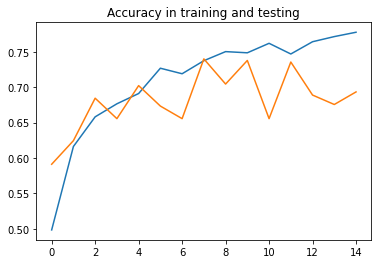

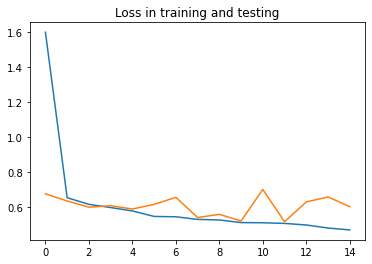

FEATURE MAPPING 

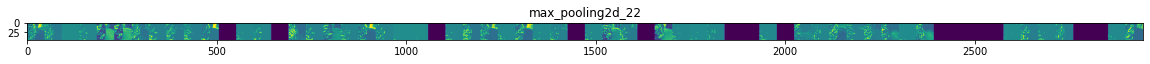

---

Now there is ***no Overfitting*** , so lets optimize it by chnaging ***optimizer***

Optimizer ***RMSprop*** solves our problem by keeping **training_accuracy** & **Validation_accuracy** as close as possible for a dataset.

***RMSprop*** restricts vertical osscilations.

---

2 layer RMSprop MODEL

In [ ]:
model_opt = tf.keras.models.Sequential([
    data_augumentation, # data augumentation
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Dropout(0.2),  # random layer droping 
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [ ]:
model_opt.compile(optimizer='RMSprop',loss='binary_crossentropy',metrics = ['accuracy'])

In [ ]:
history_opt = model_opt.fit(
            train_gen, # pass in the training generator
            steps_per_epoch=36,
            epochs=15,
            validation_data=test_gen, # pass in the validation generator
            validation_steps=9,
            verbose=2
            )

Epoch 1/15
36/36 - 99s - loss: 3.5657 - accuracy: 0.5274 - val_loss: 0.6157 - val_accuracy: 0.6689 - 99s/epoch - 3s/step
Epoch 2/15
36/36 - 93s - loss: 0.6587 - accuracy: 0.6257 - val_loss: 0.6072 - val_accuracy: 0.6844 - 93s/epoch - 3s/step
Epoch 3/15
36/36 - 102s - loss: 0.6453 - accuracy: 0.6715 - val_loss: 0.8338 - val_accuracy: 0.6111 - 102s/epoch - 3s/step
Epoch 4/15
36/36 - 96s - loss: 0.6133 - accuracy: 0.6804 - val_loss: 0.5692 - val_accuracy: 0.7000 - 96s/epoch - 3s/step
Epoch 5/15
36/36 - 94s - loss: 0.6002 - accuracy: 0.6983 - val_loss: 0.5953 - val_accuracy: 0.6933 - 94s/epoch - 3s/step
Epoch 6/15
36/36 - 98s - loss: 0.6132 - accuracy: 0.6972 - val_loss: 0.5298 - val_accuracy: 0.7467 - 98s/epoch - 3s/step
Epoch 7/15
36/36 - 94s - loss: 0.5817 - accuracy: 0.7117 - val_loss: 0.5636 - val_accuracy: 0.7333 - 94s/epoch - 3s/step
Epoch 8/15
36/36 - 95s - loss: 0.5813 - accuracy: 0.7167 - val_loss: 0.5436 - val_accuracy: 0.7444 - 95s/epoch - 3s/step
Epoch 9/15
36/36 - 103s - loss

EVALUVATION

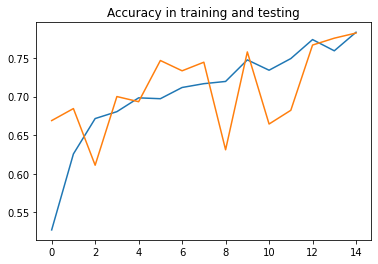

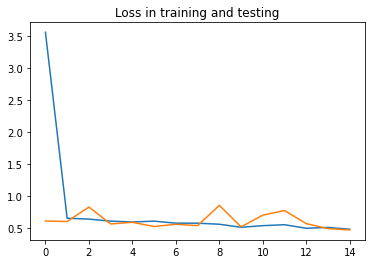

FEATURE MAPPING

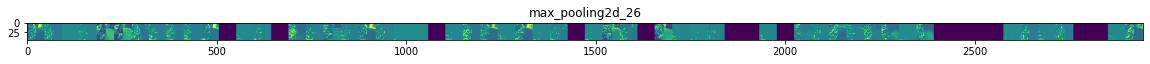

---

After changing the optimizer to ***RMSprop*** we got better matching and accuracy than ***adam***. So now lets add a conv2D layer and Maxpooling layer to extract more features and **improve accuracy**.

---

3 layered RMSprop MODEL

In [ ]:
model_opt2 = tf.keras.models.Sequential([
    data_augumentation, # data augumentation
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),  # random layer droping 
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [ ]:
model_opt2.compile(optimizer='RMSprop',loss='binary_crossentropy',metrics = ['accuracy'])

In [ ]:
history_opt2 = model_opt2.fit(
            train_gen, # pass in the training generator
            steps_per_epoch=36,
            epochs=15,
            validation_data=test_gen, # pass in the validation generator
            validation_steps=9,
            verbose=2
            )

Epoch 1/15
36/36 - 94s - loss: 0.3311 - accuracy: 0.8581 - val_loss: 0.4228 - val_accuracy: 0.8400 - 94s/epoch - 3s/step
Epoch 2/15
36/36 - 97s - loss: 0.3224 - accuracy: 0.8648 - val_loss: 0.7141 - val_accuracy: 0.7711 - 97s/epoch - 3s/step
Epoch 3/15
36/36 - 93s - loss: 0.3229 - accuracy: 0.8648 - val_loss: 0.4778 - val_accuracy: 0.7978 - 93s/epoch - 3s/step
Epoch 4/15
36/36 - 93s - loss: 0.3121 - accuracy: 0.8726 - val_loss: 0.4684 - val_accuracy: 0.8311 - 93s/epoch - 3s/step
Epoch 5/15
36/36 - 98s - loss: 0.2995 - accuracy: 0.8644 - val_loss: 0.8306 - val_accuracy: 0.7400 - 98s/epoch - 3s/step
Epoch 6/15
36/36 - 93s - loss: 0.2829 - accuracy: 0.8760 - val_loss: 0.5242 - val_accuracy: 0.8133 - 93s/epoch - 3s/step
Epoch 7/15
36/36 - 93s - loss: 0.3107 - accuracy: 0.8721 - val_loss: 0.4015 - val_accuracy: 0.8533 - 93s/epoch - 3s/step
Epoch 8/15
36/36 - 92s - loss: 0.2885 - accuracy: 0.8832 - val_loss: 0.4339 - val_accuracy: 0.8222 - 92s/epoch - 3s/step
Epoch 9/15
36/36 - 92s - loss: 0

EVALUVATION

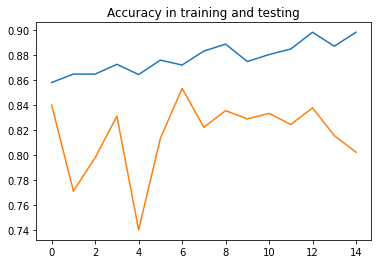

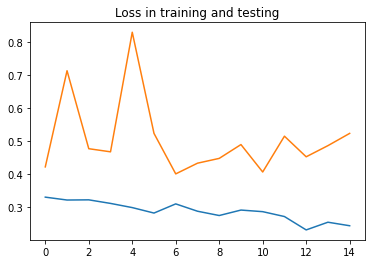

FEATURE MAP

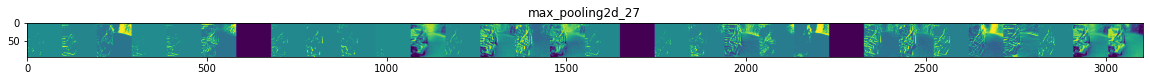

### FINAL RESULTS 

train_accuracy = 89.83 % ==> 90 %

validation_accuracy = 80.22 % ==> 80 %

loss = 0.2445

validation_loss = 0.5242

which is a better improvement from (100 , 80, 0.1326 , 0.7844 ) to ( 90 ,80, 0.2445 , 0.5242)

### DRIVE LINKS

MODEL DRIVE LINK : https://drive.google.com/file/d/1-AP4cMctAZ7hSv63sDMcNPo_O1KC4jdP/view?usp=sharing

WEIGHTS DRIVE LINK : https://drive.google.com/file/d/1-D5NVduYDYEqNDJh379W4gJlZCuXpNoR/view?usp=sharing

ARCHITECTUR DRIVE LINK : https://drive.google.com/file/d/1-Ge2qtLe31kttiEm5B16RvkpqC4of_M2/view?usp=sharing